In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import sympy
import matplotlib
import scipy
from scipy.fftpack import fft #дискретное преобразрвание Фурье 
from scipy.fftpack import ifft #обратное преобразрвание Фурье 

1

In [2]:
fmax =20
N=1000

In [3]:
def welve(t):
    return np.exp((-t**2)/alpha**2)*np.exp(i*2*np.pi*t)    #x(t)

def welve2(t):
    return alpha*np.sqrt(np.pi)*np.exp(((-alpha)**2)*((2*np.pi - t)**2)/4)

def mexi_hat(t):
    return (1-t**2)*np.exp(-t**2/2)

In [4]:
alpha = 1
i = np.complex(0,1)
i

C:\Users\79039\AppData\Local\Temp\ipykernel_8612\1840492585.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0,1)


1j

In [5]:
###
x_ones = np.linspace(0,1,100)
x1_ones = np.fft.fftshift(np.fft.fftfreq(x_ones.shape[-1], x_ones[1]-x_ones[0]))
###

x = np.linspace(-10,10,1000)
x1 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))

xf = np.linspace(0.0,fmax/2,N//2)

y = [welve(t) for t in x] 
#y_1 = [welve2(t) for t in x1] 
y_11 = fft([welve(t) for t in x1])

y_hat = [mexi_hat(t) for t in x] 
y_hat_f = fft([mexi_hat(t) for t in x1]) 


In [6]:
x.shape

(1000,)

C:\Users\79039\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


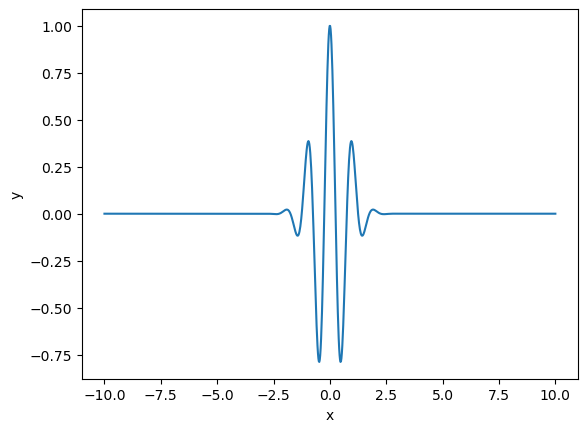

In [7]:
plt.plot(x, y)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

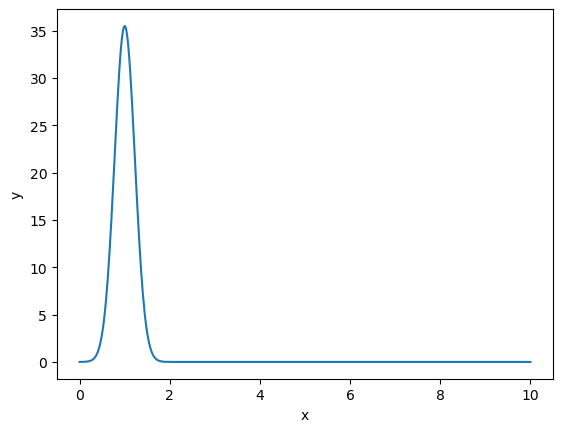

In [8]:
plt.plot(xf, np.abs(y_11)[0:N//2])   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2


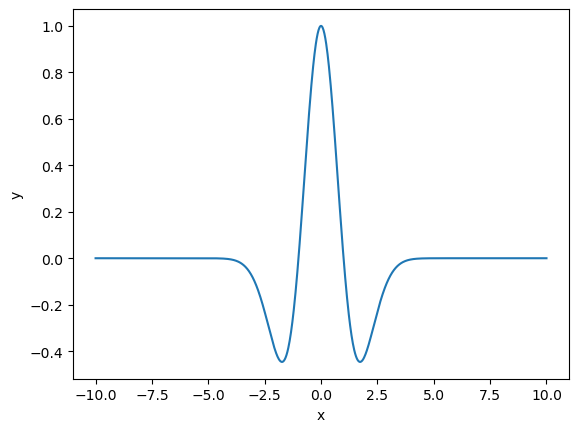

In [9]:
plt.plot(x, (y_hat))   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

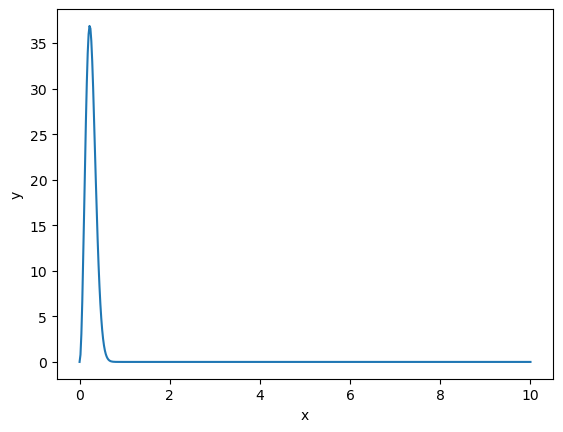

In [10]:
plt.plot(xf, np.abs(y_hat_f)[0:N//2])   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

3

In [11]:
def haar(x):
    if x>=0 and x<1/2:
        return 1
    else:
        if x>=1/2 and x<1:
            return -1
        else: 
            return 0
    

In [12]:

x = np.linspace(-4,4,1000)
x1 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))

xf = np.linspace(0.0,fmax/2,N//2)


y_haar = [haar(t) for t in x] 
y_haar_f = fft([haar(t) for t in x1] )

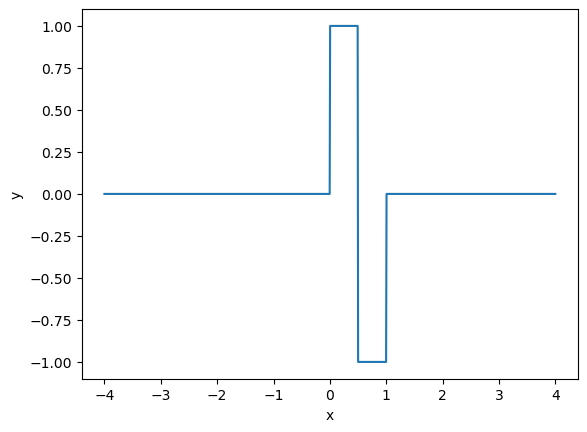

In [13]:
plt.plot(x, y_haar)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

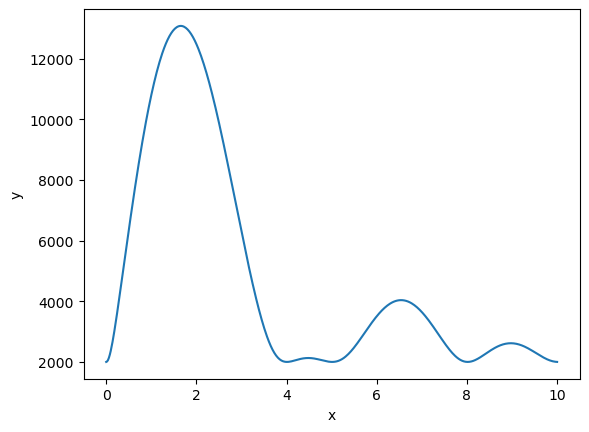

In [14]:
plt.plot(xf, 2.0*N*abs(y_haar_f)[0:N//2])   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

4

In [15]:
noise = np.random.normal(0,1,x.shape) # значения белого шума
signal = np.random.normal(-5,5,x.shape) # значения белого шума

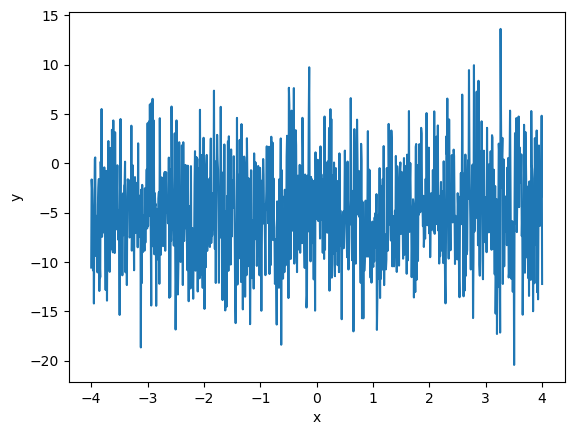

In [16]:
plt.plot(x,signal)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

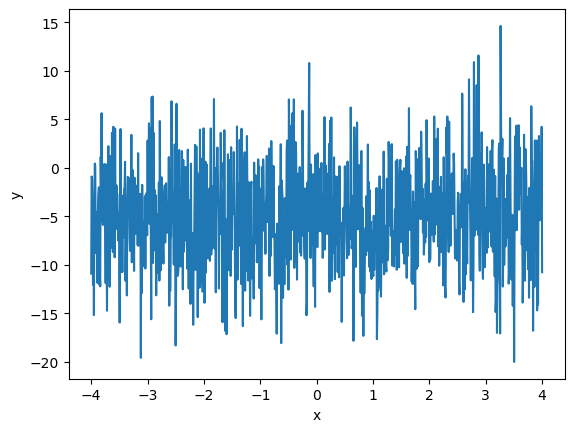

In [17]:
plt.plot(x,signal+noise)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
y_conv_w = np.convolve(signal,y, mode = 'same')

In [19]:
y_conv_hat = np.convolve(signal,y_hat, mode = 'same')

In [20]:
y_conv_haar = np.convolve(signal,y_haar, mode = 'same')

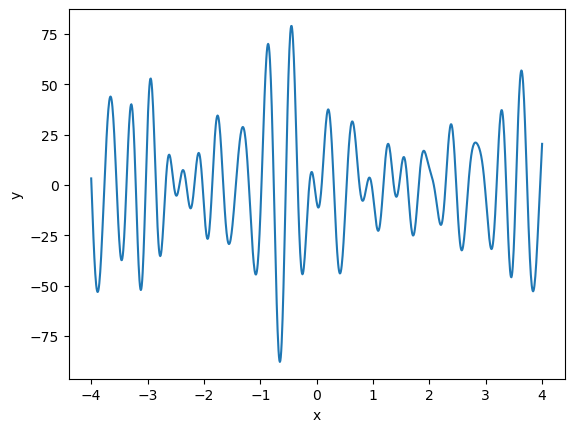

In [21]:
plt.plot(x,y_conv_w)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

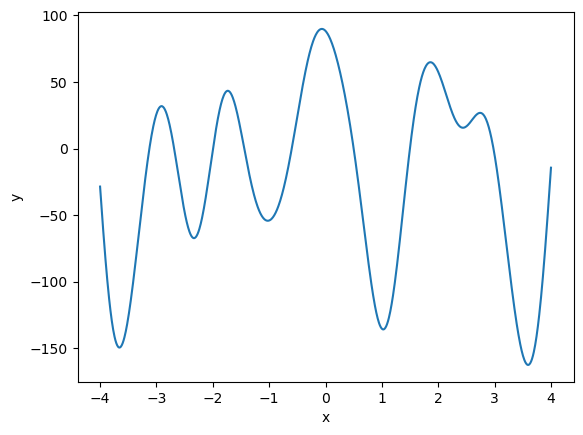

In [22]:
plt.plot(x,y_conv_hat)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

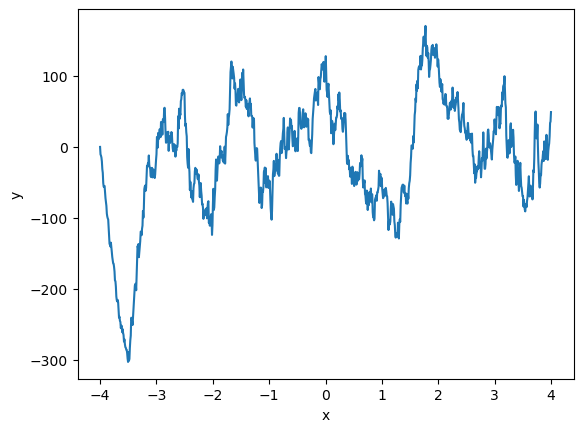

In [23]:
plt.plot(x,y_conv_haar)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 5

In [24]:
alpha = 1
i = np.complex(0,1)
i

C:\Users\79039\AppData\Local\Temp\ipykernel_8612\1840492585.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0,1)


1j

In [25]:
def welve(t):
    return np.exp((-t**2)/alpha**2)*np.exp(i*2*np.pi*t)    #x(t)


In [26]:
N = 1000
x = np.arange(-3,3, 1/N)

y = ([welve(t) for t in x] )

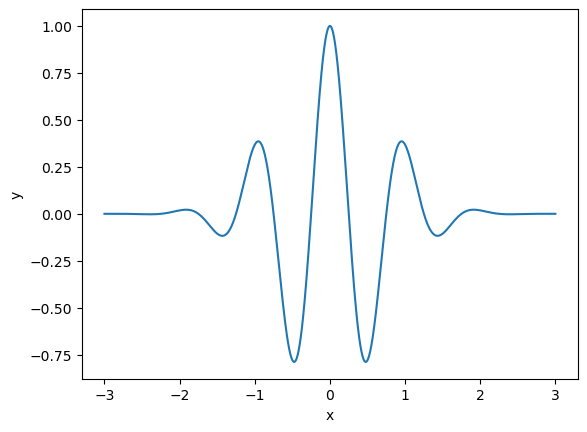

In [27]:
plt.plot(x,y)   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
fmax =200
N=len(y_time)
x1 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))
y_11 = fft([welve(t) for t in x1])

NameError: name 'y_time' is not defined

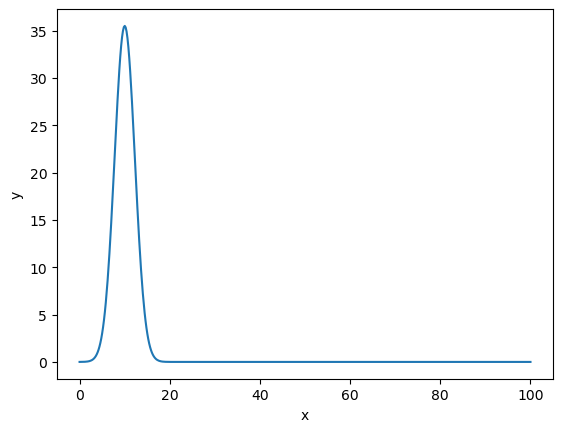

In [29]:
xf = np.linspace(0.0,fmax/2,N//2)
plt.plot(xf, np.abs(y_11)[0:N//2])   
plt.xlabel('x')
plt.ylabel('y')
plt.show()

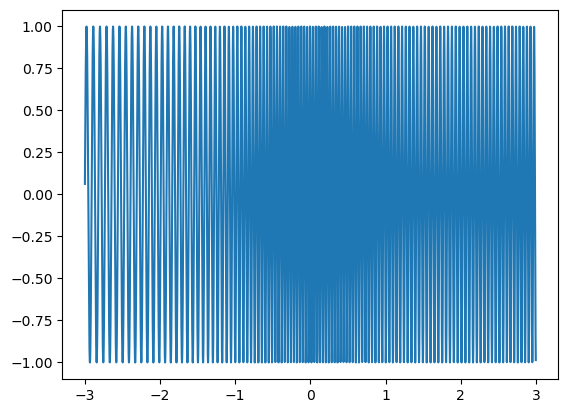

In [30]:
N = 1000
time = np.arange(-3,3, 1/N)
pnts  = len(time)
freqmod = np.exp(-time**2)*10+10
freqmod = freqmod + np.linspace(0,10,pnts)
signal  = np.sin( 2*np.pi * (time + np.cumsum(freqmod)/N) );

plt.plot(time,signal)
plt.show()

In [31]:
y_con = np.convolve(signal,y)

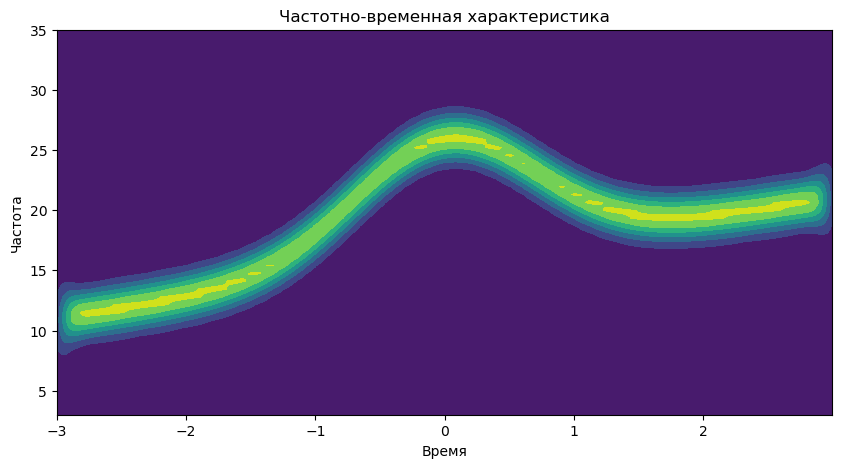

In [32]:
import scipy
from scipy import fftpack

Freq1 = 50
Freq2  = np.linspace(3, 35, Freq1)
fwhm  = .2 

Ws = np.zeros((Freq1, len(time)), dtype=complex)

for wi in range(0, Freq1):
    gauss = np.exp(-(4 * np.log(2) * time**2) / fwhm**2)
    Ws[wi, :] = np.exp(1j * 2 * np.pi * Freq2[wi] * time) * gauss
    
conv = pnts * 2-1
half = int(np.floor(pnts / 2) + 1)
sigX = scipy.fftpack.fft(signal, conv)
tf = np.zeros((Freq1, len(time)))

for fi in range(0, Freq1):
    waveX = scipy.fftpack.fft(Ws[fi,:], conv)
    waveX = waveX / np.max(waveX)
    conv_res = scipy.fftpack.ifft(waveX * sigX)
    conv_res = conv_res[half - 3 : -half]
    tf[fi, :] = np.abs(conv_res)**2
    
fig = plt.figure(figsize=(10,5))
plt.contourf(time, Freq2, tf)
plt.xlabel('Время')
plt.ylabel('Частота')
plt.title('Частотно-временная характеристика')
plt.show()

# 6

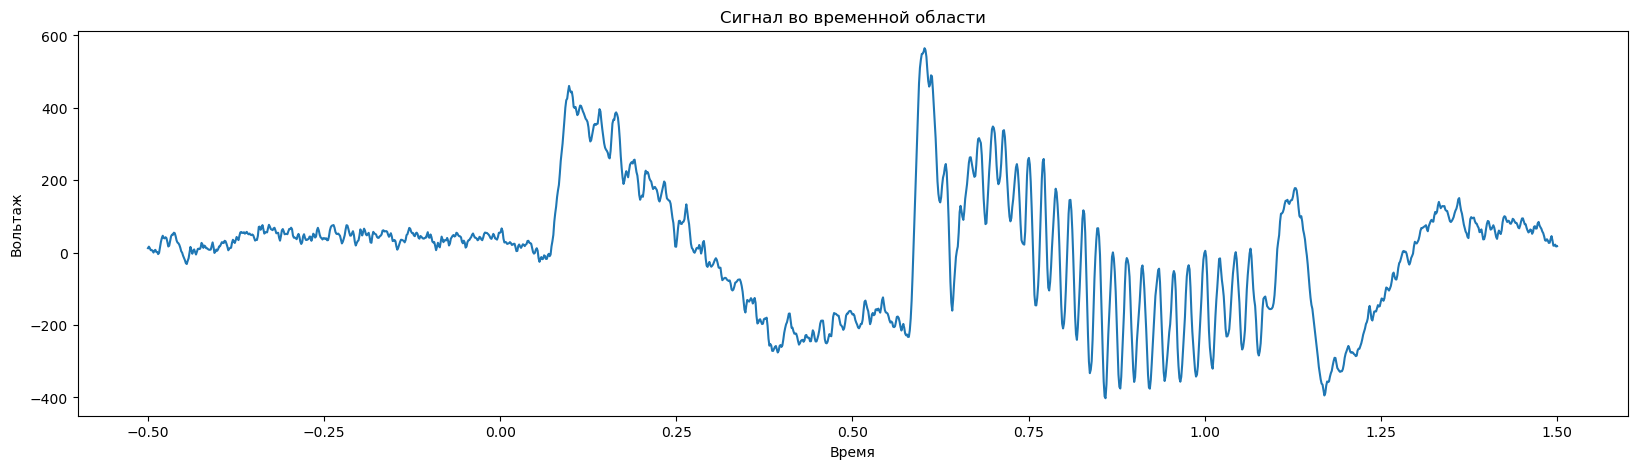

In [33]:
import scipy.io as sio

braindat = sio.loadmat(r'Lab6_Data.mat')
time_vec = braindat['timevec'][0]
s_rate = braindat['srate'][0]
data = braindat['data'][0]

fig = plt.figure(figsize=(20,5))
plt.plot(time_vec, data)
plt.xlabel('Время')
plt.ylabel('Вольтаж')
plt.title('Сигнал во временной области')
plt.show()

In [34]:
y = ([welve(t) for t in time_vec]) 
y= np.convolve(data,y)

In [35]:
Freq1 = 50 
Freq2  = np.linspace(8, 70, Freq1)
fs  = .2 

Wtime = np.arange(-2, 2, 1 / s_rate)

Ws = np.zeros((Freq1, len(Wtime)), dtype=complex)

for wi in range(0,Freq1):
    gauss = np.exp(-(4 * np.log(2) * Wtime**2) / fs**2)
    Ws[wi,:] = np.exp(1j * 2 * np.pi * Freq2[wi] * Wtime) * gauss
    
conv = len(time_vec) + len(Wtime) - 1
half = int(np.floor(len(Wtime) / 2))

dataX = scipy.fftpack.fft(y, conv)################data

tf = np.zeros((Freq1, len(time_vec)))

for fi in range(0,Freq1):
    waveX = fft(Ws[fi,:], conv)
    waveX = waveX/np.max(waveX)

    conv_res = scipy.fftpack.ifft( waveX*dataX )
    conv_res = conv_res[half-1 : -half]
    
    tf[fi,:] = np.abs(conv_res)**2

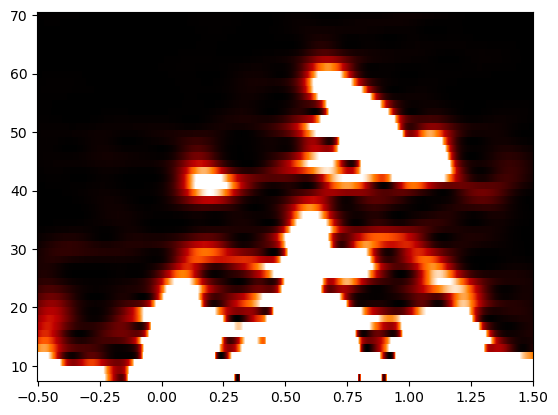

In [36]:
plt.pcolormesh(time_vec, Freq2, tf, vmin=0, vmax=1e3, cmap = 'gist_heat')
plt.show()

# 7

In [37]:
import os
import librosa
import IPython.display as ipd

def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Notebook: C1/B_PythonAudio.ipynb
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))


MP3 file:  Fs = 48000, x.shape = (32210,), x.dtype = float32


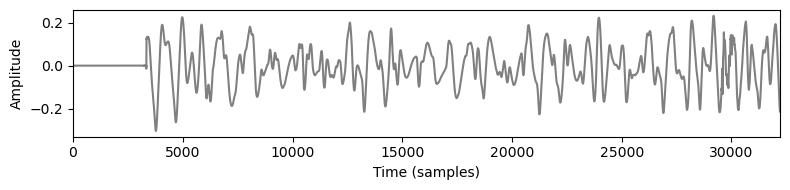

In [38]:
fn_mp3 = os.path.join('happy-happy-happy-cat-in-360-vr-4k_(MUZMiNO.ORG).mp3')
x, Fs = librosa.load(fn_mp3, sr=None)
x = x[0:len(x)//100]

print_plot_play(x=x, Fs=Fs, text='MP3 file: ')

In [39]:
len(x)//2

16105

C:\Users\79039\AppData\Local\Temp\ipykernel_8612\779878535.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


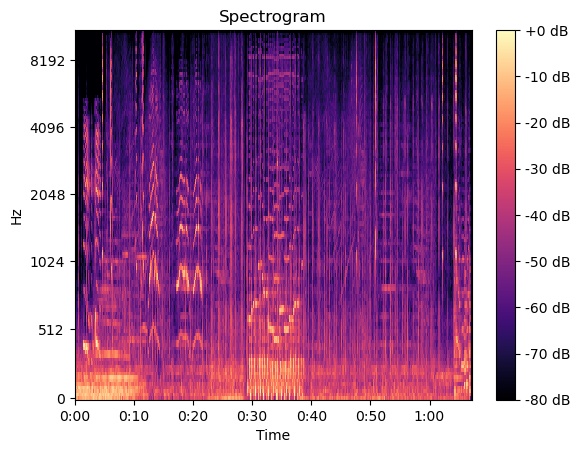

In [40]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load('happy-happy-happy-cat-in-360-vr-4k_(MUZMiNO.ORG).mp3')

# Compute spectrogram
spec = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert power to decibels
spec_db = librosa.power_to_db(spec, ref=np.max)

# Plot spectrogram
fig, ax = plt.subplots(nrows = 1, ncols = 1)
img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', ax = ax)
fig.colorbar(img, ax = ax, format='%+2.0f dB')
ax.set_title('Spectrogram')
fig.show()

In [41]:

y1 = ([mexi_hat(t) for t in time_vec]) 

y1= np.convolve(y1,y, mode = 'valid')

C:\Users\79039\AppData\Local\Temp\ipykernel_8612\4142548484.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


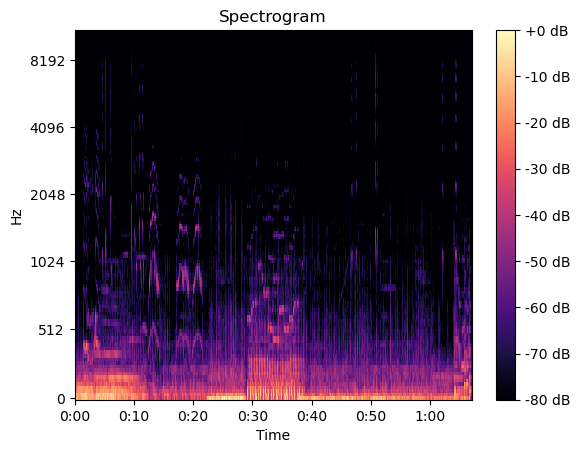

In [42]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load('happy-happy-happy-cat-in-360-vr-4k_(MUZMiNO.ORG).mp3')

# Compute spectrogram
spec = librosa.feature.melspectrogram(y=(y1), sr=sr)

# Convert power to decibels
spec_db = librosa.power_to_db(spec, ref=np.max)

# Plot spectrogram
fig, ax = plt.subplots(nrows = 1, ncols = 1)
img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', ax = ax)
fig.colorbar(img, ax = ax, format='%+2.0f dB')
ax.set_title('Spectrogram')
fig.show()

In [43]:

y1 = ([haar(t) for t in time_vec]) 

y1= np.convolve(y1,y, mode = 'valid')

C:\Users\79039\AppData\Local\Temp\ipykernel_8612\4142548484.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


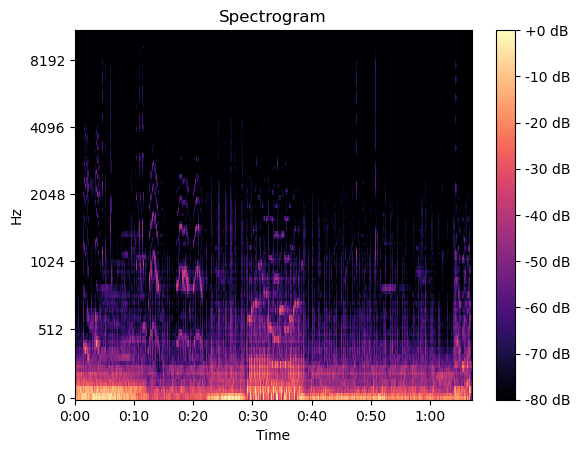

In [44]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load('happy-happy-happy-cat-in-360-vr-4k_(MUZMiNO.ORG).mp3')

# Compute spectrogram
spec = librosa.feature.melspectrogram(y=(y1), sr=sr)

# Convert power to decibels
spec_db = librosa.power_to_db(spec, ref=np.max)

# Plot spectrogram
fig, ax = plt.subplots(nrows = 1, ncols = 1)
img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', ax = ax)
fig.colorbar(img, ax = ax, format='%+2.0f dB')
ax.set_title('Spectrogram')
fig.show()